Загружаем необходимые библиотеки

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
import medpy as mp

from nilearn.image import index_img
import nilearn as nl

import matplotlib.pyplot as plt 

%matplotlib inline


import seaborn as sns
sns.set()



c:\python34x64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python34x64\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
import glob


def get_images_path(path_folder):
    images = []
    for ind, file_path in enumerate(glob.glob(path_folder + "*.img")):
#         image = io.imread(file_path)
        images.append(file_path)

    return images

In [3]:
def plot_slices(image_data):
    plt.figure(figsize=(20,25))

    for ind, img_ind in enumerate(range(0, image_data.shape[2], 4)):
        img = image_data[:,:, img_ind]
        plt.subplot(np.ceil(image_data.shape[2] / 12), 3, ind + 1), plt.imshow(img, cmap='viridis')


## Slices

In [13]:
image_pathes = get_images_path('rsfMRI_eyeopen_2/C02_BORA_CEBECI/')
images_3d = nl.image.load_img(image_pathes)

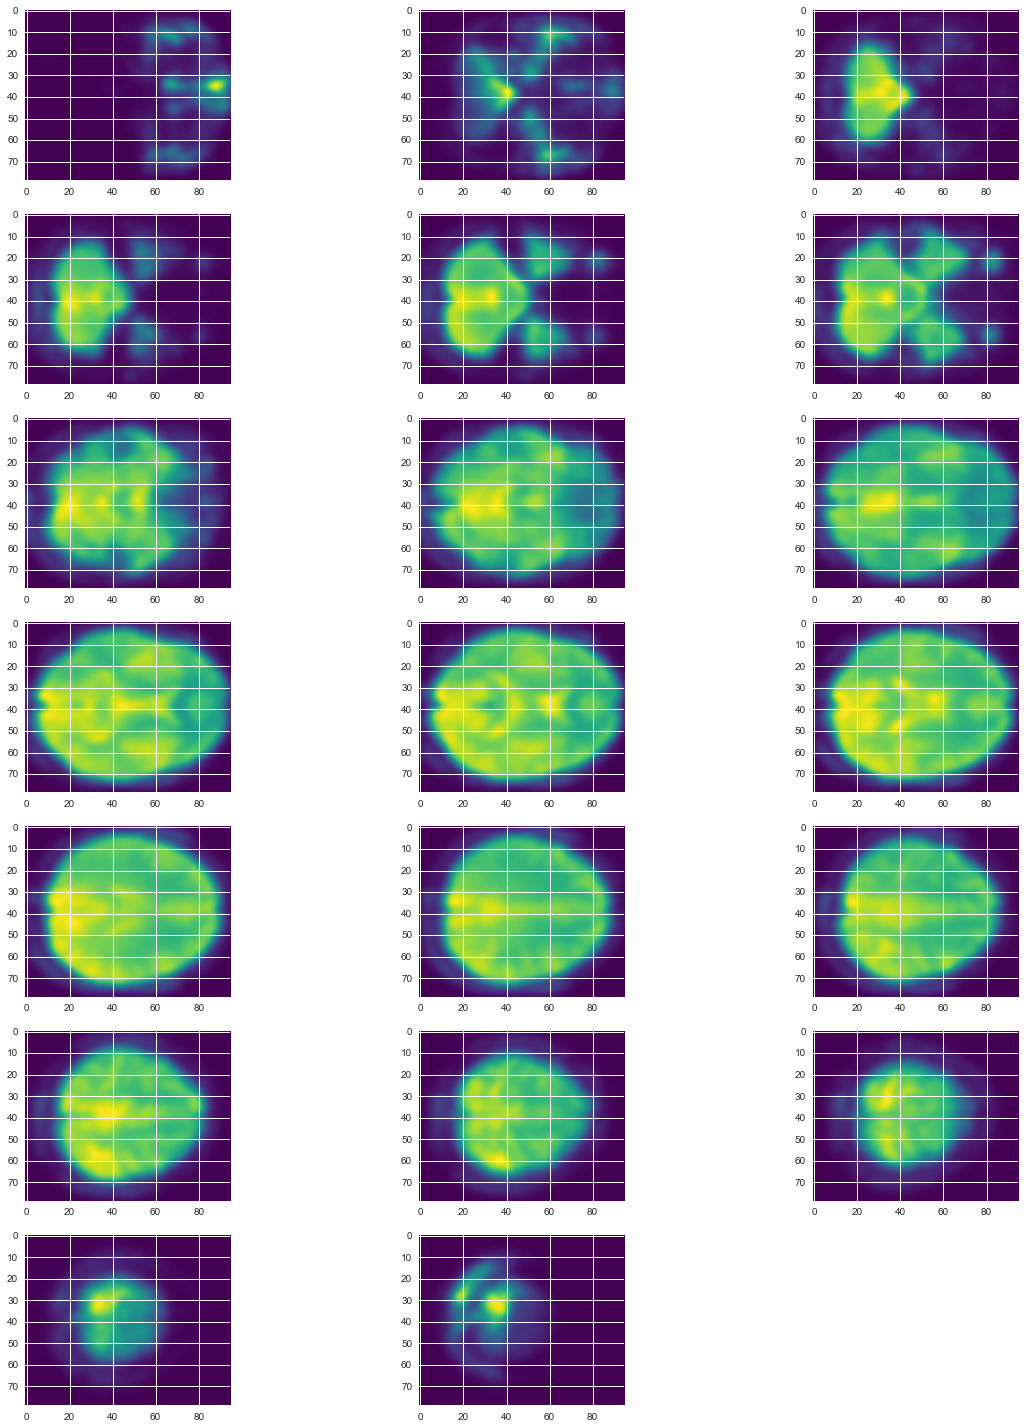

In [19]:
plot_slices(images_3d.get_data()[:,:,:,0])

# Mean image (time)

In [4]:
image_pathes = get_images_path('rsfMRI_eyeopen_2/C02_BORA_CEBECI/')
images_3d = nl.image.load_img(image_pathes)

# mean = nl.image.mean_img(images_3d, verbose=10)

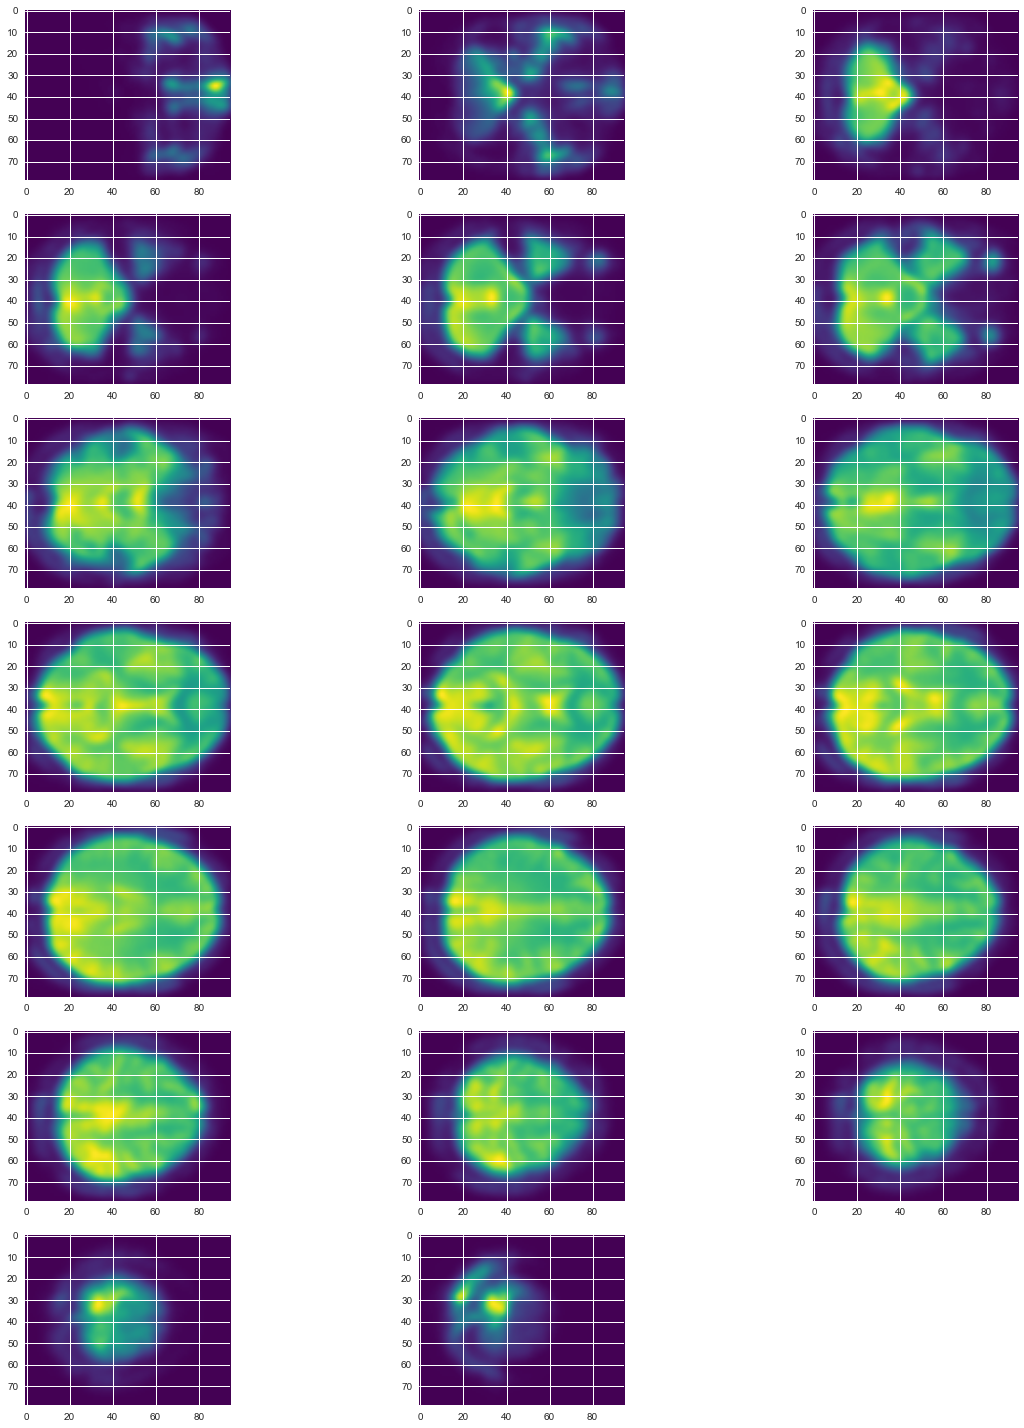

In [5]:
shape = images_3d.get_data().shape
images_3d_flat = images_3d.get_data().reshape((shape[0] * shape[1] * shape[2], shape[3]))

mean_img = np.mean(images_3d_flat, axis=1)
mean_img = mean_img.reshape(shape[0:3])

plot_slices(mean_img)

# STD image (time)

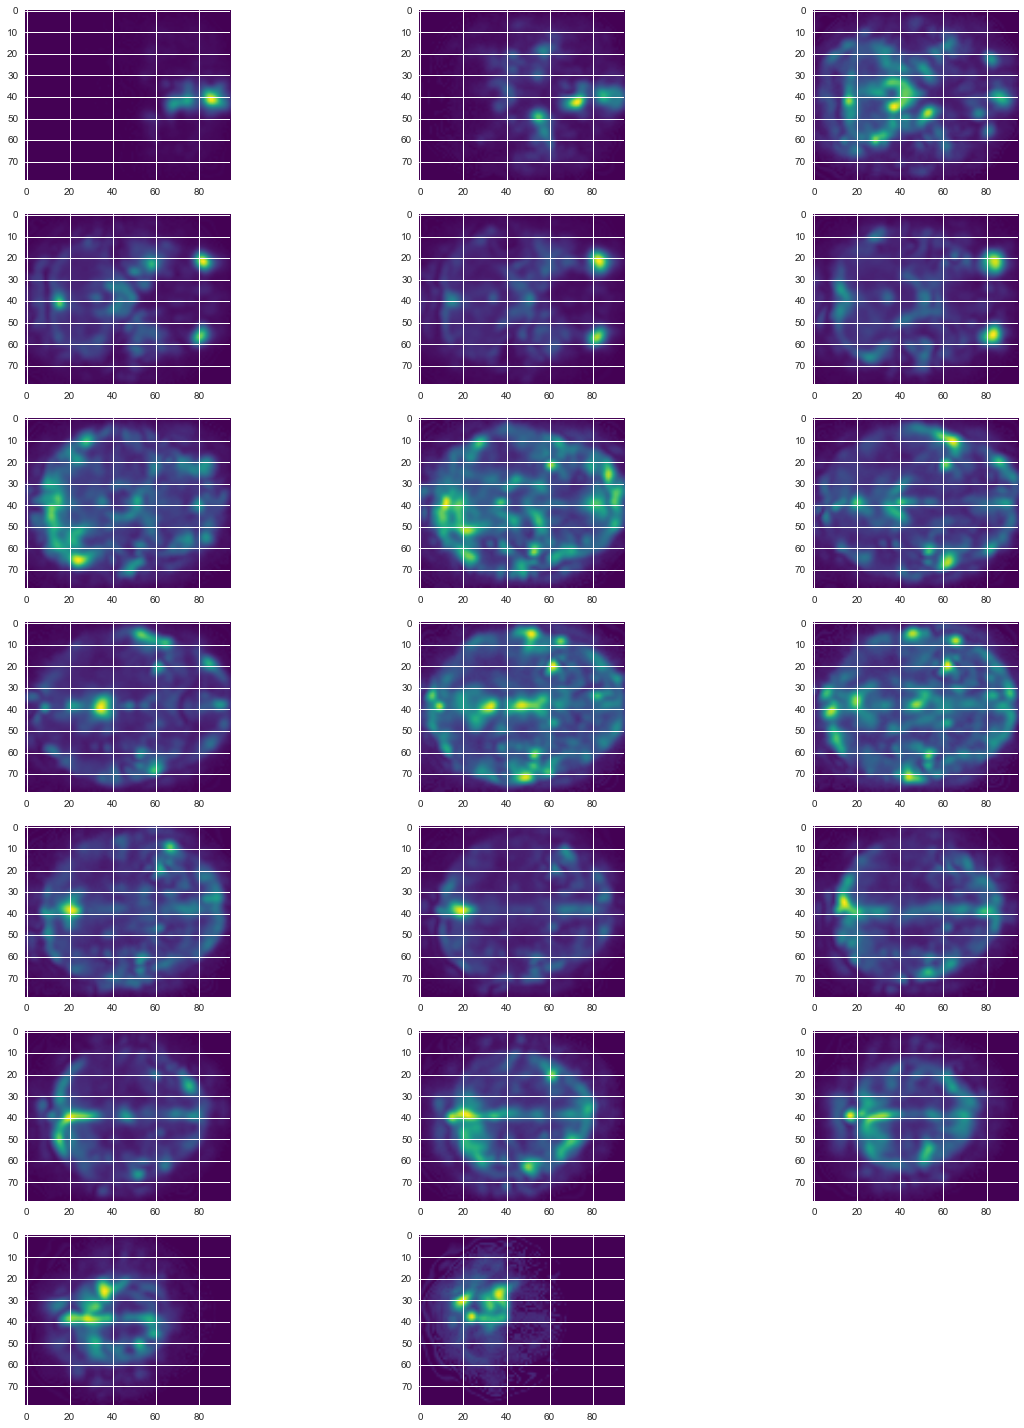

In [6]:
shape = images_3d.get_data().shape

std_img = np.std(images_3d_flat, axis=1)
std_img = std_img.reshape(shape[0:3])

plot_slices(std_img)

In [13]:
print ("max mean image", mean_img.max(), "mean mean image", mean_img.mean())
print ("max std image", std_img.max(), "mean std image", std_img.mean())

max mean image 2352.275 mean mean image 601.717466407
max std image 78.1344712659 mean std image 6.07598295645


# Plot voxel intensity per time

In [47]:

def plot_one_voxel(images_3d, x, y, z):
    plot_values = images_3d.get_data()[x, y, z, :]
    plot_x = np.arange(plot_values.shape[0])

    plt.figure(figsize=(20,10))
    plt.plot(plot_values)

In [48]:
sorted_std = np.sort(std_img.flatten())[::-1]
x, y, z = [arr[0] for arr in np.where(std_img==sorted_std[0])]
x, y, z

(41, 85, 0)

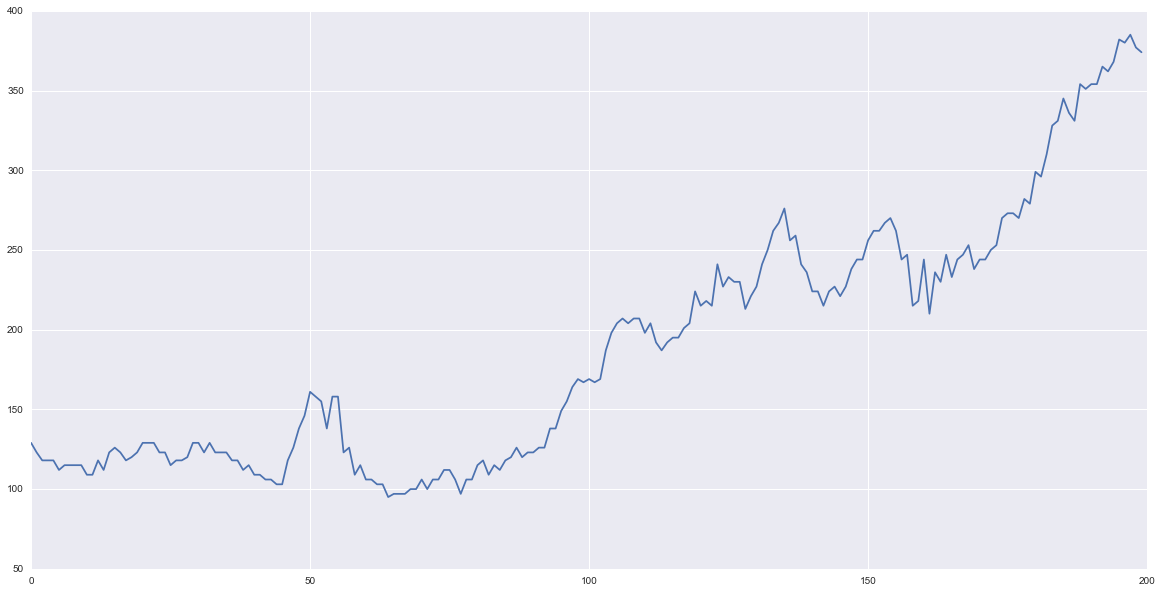

In [49]:
plot_one_voxel(images_3d, x, y, z)

## Plot voxels with biggest std

x, y, z, value:     41 85 0 78.1344712659
x, y, z, value:     41 86 0 77.4478519715
x, y, z, value:     56 82 18 75.7174271552
x, y, z, value:     22 83 17 75.6530970946
x, y, z, value:     42 86 0 75.6438297219
x, y, z, value:     42 85 0 75.2246442331
x, y, z, value:     57 82 18 74.4445726699
x, y, z, value:     21 83 17 74.2142513268
x, y, z, value:     22 82 17 74.0712494832
x, y, z, value:     21 82 17 73.7613035405


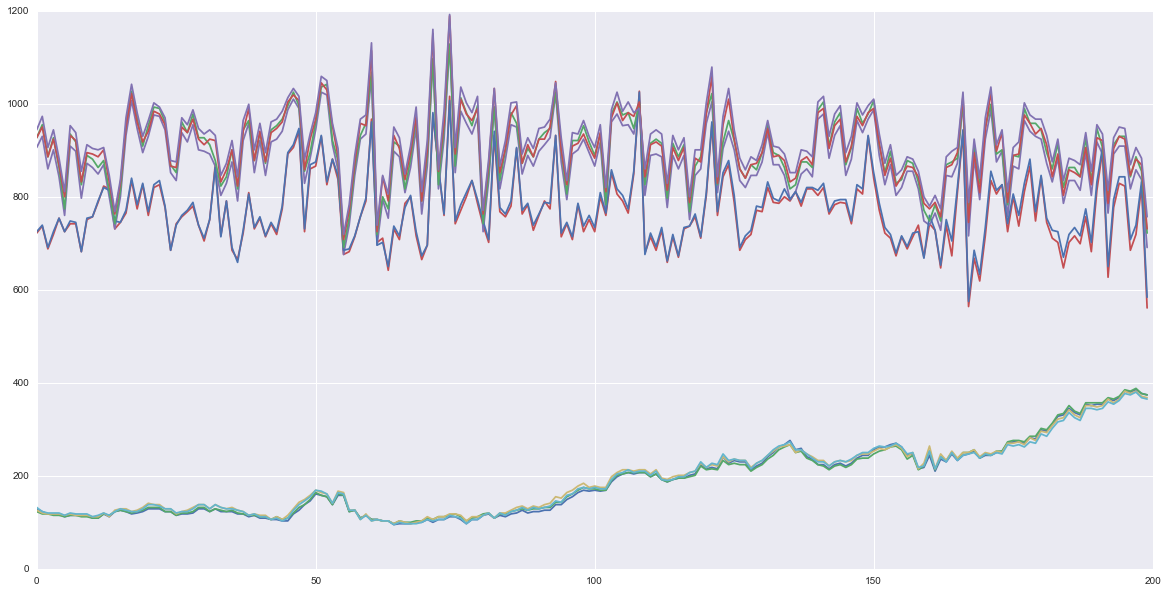

In [56]:
plt.figure(figsize=(20,10))

for i in range(10):
    sorted_std = np.sort(std_img.flatten())[::-1]
    x, y, z = [arr[0] for arr in np.where(std_img==sorted_std[i])]
    print("x, y, z, value:    ", x, y, z, sorted_std[i])

    plot_values = images_3d.get_data()[x, y, z, :]
    plot_x = np.arange(plot_values.shape[0])

    plt.plot(plot_values)